# Behavorial Analysis of malware using Machine learning

## Aim: To transition from signature based analysis to behavorial analysis 

### Techniques that exist:
* Signature based analysis : Requires Hash, fails for polymorphic virus and new malware sample.
* Behavorial analysis using sandbox: analyse behavior by executing the malware sample, also sandbox work on rules.If anitvirus identfies rule, it evades it. Hence, continously keep changing the rules. Works for polymorphic viruses.
* Behavorial analysis using machine learning: Automate the manual labor required in (2).

### Use of anitvirus labels
Antivirus scanners are designed to detect malware and, to a lesser extent, to label detections based on a family association. The labeling provided by AV vendors has many applications such as guiding efforts of disinfection and countermeasures, intelligence gathering, and attack attribution, among others.

### What are we upto?
* We are trying to confirm whether there exists a link between anitvirus labels and behavior exibited by the malware samples (by using classification).
* Trying to figure out an unsupervised algorithm to represent behavior based clusters.
* Assosciating a cluster to each of the malwares. Performing classification on these newly assigned clusters to ensure that the behaviour based clustering is an appropriate technique. 
* Also, to verify this technique we would have to draw samples from same cluster and neutralize it (if possible)

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sompy.sompy import SOMFactory

In [0]:
tp = pd.read_csv('data_new.csv', chunksize=94, iterator=True, header=None)

In [0]:
df = pd.concat(tp,ignore_index=True)

In [0]:
df.head()

0      1      2     3    4    5     6    7    8    9     ...    594  595  \
0  28.0  223.0   12.0   1.0  3.0  2.0  70.0  8.0  7.0  1.0   ...    0.0  0.0   
1  80.0  238.0  104.0  58.0  0.0  0.0  70.0  7.0  6.0  1.0   ...    0.0  0.0   
2   1.0    9.0    6.0   2.0  3.0  0.0  20.0  1.0  0.0  0.0   ...    0.0  0.0   
3  17.0   20.0   11.0   3.0  0.0  0.0  17.0  4.0  0.0  1.0   ...    0.0  0.0   
4   0.0    6.0    3.0   1.0  0.0  0.0  34.0  3.0  0.0  2.0   ...    0.0  0.0   

   596  597  598  599  600  601  602     603  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0    10.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   100.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1000.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1001.0  

[5 rows x 604 columns]

In [0]:
df.shape

(3639, 604)

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=50)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.explained_variance_ratio_

array([ 0.20204572,  0.0988628 ,  0.08103503,  0.06615549,  0.05077377,
        0.04389673,  0.04121119,  0.04011773,  0.0385944 ,  0.03050957,
        0.02911248,  0.02782076,  0.0265224 ,  0.02516073,  0.02270482,
        0.0220526 ,  0.01499452,  0.01212635,  0.01182684,  0.01048874,
        0.01002271,  0.00760291,  0.00710293,  0.00599248,  0.00533575,
        0.00494388,  0.00454662,  0.00442813,  0.00369808,  0.00335481,
        0.00323884,  0.00286925,  0.00272181,  0.00261928,  0.00242391,
        0.00226066,  0.00212784,  0.0019617 ,  0.00193473,  0.00187086,
        0.00182537,  0.00168685,  0.00142841,  0.00135223,  0.00130743,
        0.00127467,  0.00116694,  0.00088083,  0.00081625,  0.0007656 ])

In [0]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([ 20.2 ,  30.09,  38.19,  44.81,  49.89,  54.28,  58.4 ,  62.41,
        66.27,  69.32,  72.23,  75.01,  77.66,  80.18,  82.45,  84.66,
        86.16,  87.37,  88.55,  89.6 ,  90.6 ,  91.36,  92.07,  92.67,
        93.2 ,  93.69,  94.14,  94.58,  94.95,  95.29,  95.61,  95.9 ,
        96.17,  96.43,  96.67,  96.9 ,  97.11,  97.31,  97.5 ,  97.69,
        97.87,  98.04,  98.18,  98.32,  98.45,  98.58,  98.7 ,  98.79,
        98.87,  98.95])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

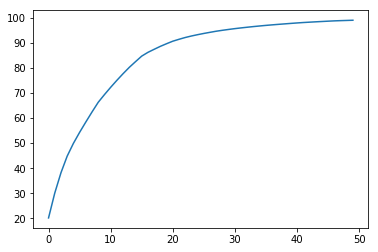

In [0]:
plt.plot(var1)

In [0]:
data1=pca.fit_transform(df)

In [0]:
from sklearn.cluster import KMeans

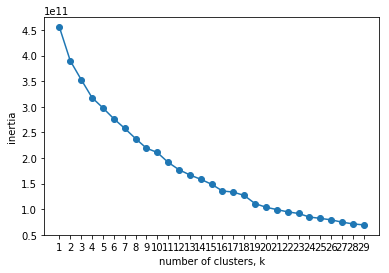

In [0]:
ks = range(1, 30)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(data1)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [0]:
sm = SOMFactory().build(data1,mapsize=[20,20], normalization = 'var', initialization='random') # mapsize denotes the number of blocks across x and y 

In [0]:
sm.train(n_job=1, verbose=False, train_rough_len=2, train_finetune_len=5)

('maxtrainlen %d', inf)
('maxtrainlen %d', inf)


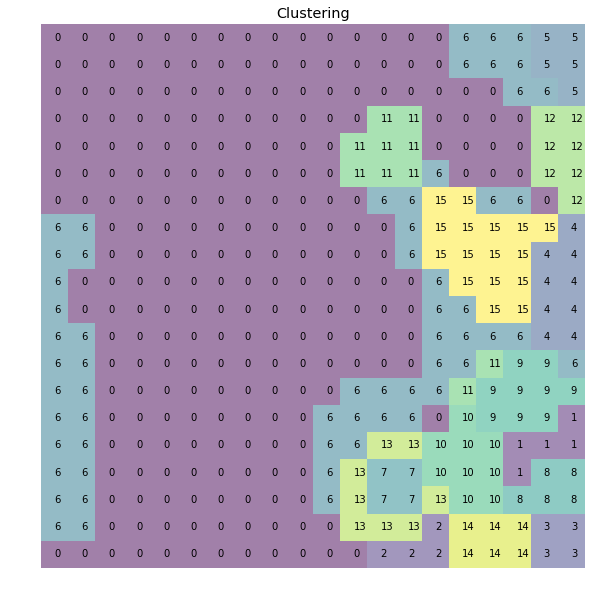

In [0]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(16) # here number of output nodes equal to number of clusters 
hits  = HitMapView(10,10,"Clustering",text_size=12,packed=True) # here the numbers define the block size
a=hits.show(sm)

In [0]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.0679813181111; Quantization error = 1.03812793121


In [0]:
labels=pd.read_csv('scores_new.csv',header=None)

In [0]:
labels.head()

0    1                                 2                            3  \
0     1  3.8  VirusShare_0a0a0d4f02692c87fc908   TrojanDownloader.Small.mru   
1    10  6.4  VirusShare_0a0c792921092fe45d663  Trojan.Win32.Injector.obgnq   
2   100  1.6  VirusShare_0a6f45cbed094ad9b71be      Backdoor.Win32.Agent.IJ   
3  1000  6.4  VirusShare_1d566bd3acbb610be389e        Backdoor.Win32.Cetorp   
4  1001  2.2  VirusShare_1d587c74fd7292e13e5bd    Trojan.Win32.Kykymber.gen   

                  4                                 5  
0  TrojanDownloader  PE32 executable (GUI) Intel 8038  
1           VirTool  PE32 executable (GUI) Intel 8038  
2          Backdoor  PE32 executable (GUI) Intel 8038  
3          Backdoor  PE32 executable (GUI) Intel 8038  
4               PWS  PE32 executable (DLL) (GUI) Inte

In [0]:
y=labels[4]

In [0]:
y.value_counts()

none                1241
Trojan               874
Virus                241
Backdoor             222
TrojanDownloader     219
PWS                  148
VirTool              147
Worm                 114
Exploit               89
TrojanSpy             57
TrojanClicker         52
TrojanDropper         51
BrowserModifier       35
SoftwareBundler       29
Rogue                 29
Adware                25
Ransom                14
TrojanProxy           12
HackTool              10
Flooder                8
DoS                    6
Spammer                4
MonitoringTool         4
Dialer                 3
DDoS                   2
Joke                   2
Constructor            1
Name: 4, dtype: int64

In [0]:
y.nunique()

27

In [0]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(data1)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs,ys)
plt.show()

In [0]:
lab=y.tolist()

In [0]:
unlabels=set(lab)

In [0]:
unlabels

{'Adware',
 'Backdoor',
 'BrowserModifier',
 'Constructor',
 'DDoS',
 'Dialer',
 'DoS',
 'Exploit',
 'Flooder',
 'HackTool',
 'Joke',
 'MonitoringTool',
 'PWS',
 'Ransom',
 'Rogue',
 'SoftwareBundler',
 'Spammer',
 'Trojan',
 'TrojanClicker',
 'TrojanDownloader',
 'TrojanDropper',
 'TrojanProxy',
 'TrojanSpy',
 'VirTool',
 'Virus',
 'Worm',
 'none'}

In [0]:
from minisom_new import MiniSom 
som= MiniSom(x=7,y=7,input_len=40,sigma=1.0)

In [0]:
som.random_weights_init(data=data1)
som.train_random(data=data1,num_iteration=100)

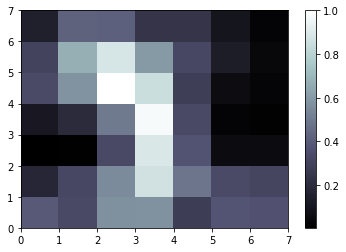

In [0]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
plt.show()

In [0]:
scores=pd.read_csv('scores.csv',header=None)

In [0]:
scores.head()

0    1                                 2                            3  \
0     1  3.8  VirusShare_0a0a0d4f02692c87fc908   TrojanDownloader.Small.mru   
1    10  6.4  VirusShare_0a0c792921092fe45d663  Trojan.Win32.Injector.obgnq   
2   100  1.6  VirusShare_0a6f45cbed094ad9b71be      Backdoor.Win32.Agent.IJ   
3  1000  6.4  VirusShare_1d566bd3acbb610be389e        Backdoor.Win32.Cetorp   
4  1001  2.2  VirusShare_1d587c74fd7292e13e5bd    Trojan.Win32.Kykymber.gen   

                  4  
0  TrojanDownloader  
1           VirTool  
2          Backdoor  
3          Backdoor  
4               PWS

In [0]:
labels=scores[4].unique()
labels

array(['TrojanDownloader', 'VirTool', 'Backdoor', 'PWS', 'Trojan', 'Worm',
       'none', 'Exploit', 'SoftwareBundler', 'TrojanClicker',
       'BrowserModifier', 'Virus', 'Ransom', 'Flooder', 'TrojanSpy',
       'Rogue', 'DoS', 'TrojanProxy', 'TrojanDropper', 'Spammer',
       'MonitoringTool', 'Adware', 'HackTool', 'DDoS', 'Dialer',
       'Constructor', 'Joke'], dtype=object)

In [0]:
mapping={}
for i,lab in enumerate(labels):
    mapping[lab]=i
    
mapping

{'Adware': 21,
 'Backdoor': 2,
 'BrowserModifier': 10,
 'Constructor': 25,
 'DDoS': 23,
 'Dialer': 24,
 'DoS': 16,
 'Exploit': 7,
 'Flooder': 13,
 'HackTool': 22,
 'Joke': 26,
 'MonitoringTool': 20,
 'PWS': 3,
 'Ransom': 12,
 'Rogue': 15,
 'SoftwareBundler': 8,
 'Spammer': 19,
 'Trojan': 4,
 'TrojanClicker': 9,
 'TrojanDownloader': 0,
 'TrojanDropper': 18,
 'TrojanProxy': 17,
 'TrojanSpy': 14,
 'VirTool': 1,
 'Virus': 11,
 'Worm': 5,
 'none': 6}

In [0]:
scores.replace({4: mapping},inplace=True)


In [0]:
y=scores[4]
y

0        0
1        1
2        2
3        2
4        3
5        4
6        3
7        0
8        1
9        5
10       4
11       2
12       6
13       2
14       3
15       6
16       4
17       4
18       6
19       6
20       6
21       7
22       6
23       4
24       6
25       4
26       6
27       6
28       8
29       9
        ..
3824     0
3825     4
3826     1
3827     2
3828     5
3829     4
3830     2
3831     0
3832     6
3833     4
3834    15
3835    14
3836     4
3837     9
3838     3
3839     4
3840     2
3841     5
3842     4
3843     4
3844     0
3845     3
3846     3
3847     4
3848     6
3849     6
3850     3
3851     4
3852     6
3853     0
Name: 4, Length: 3854, dtype: int64

In [0]:
from sklearn.manifold import TSNE
import seaborn as sns
sns.set()
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(data1)


def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 27))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(27):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

scatter(tsne_features,y)

NameError: global name 'PathEffects' is not defined

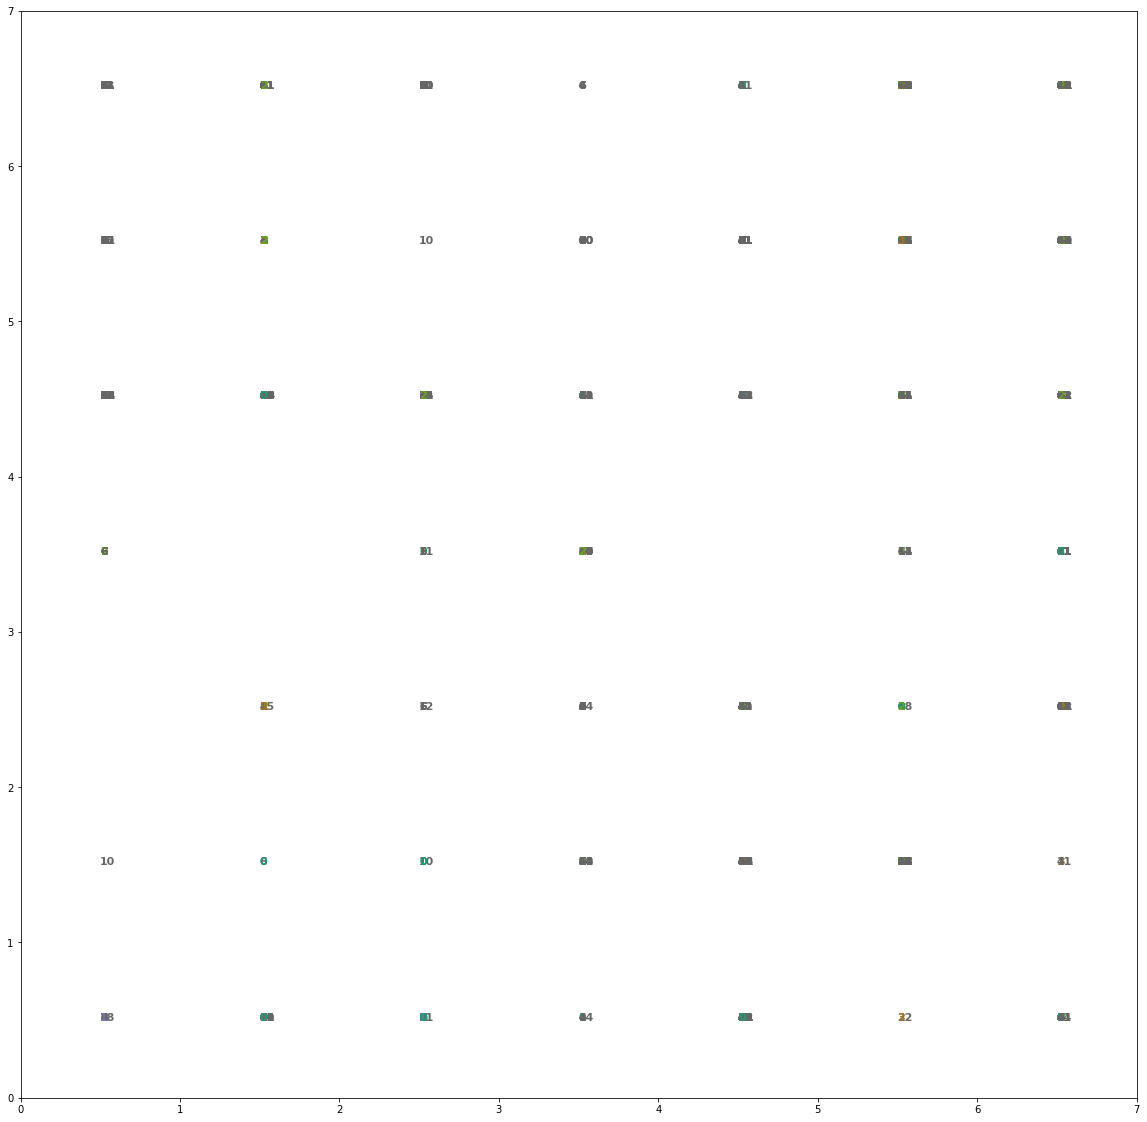

In [0]:

plt.figure(figsize=(20, 20))
wmap = {}
im = 0
for x, t in zip(data1, y):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.Dark2(t / 4), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()